In [2]:
# load libraries
import scipy as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline  
import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

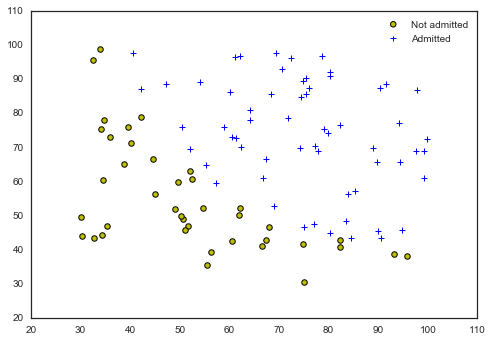

In [30]:
#load and plot the data
data = np.loadtxt('./data/ex2data1.txt',delimiter=',')
# seperate them into X and y
X = np.c_[data[:,:-1]]
y = np.c_[data[:,-1]]
m = np.size(y)
X_ext = np.c_[np.ones(m),X]
# plot
ind0=np.nonzero(y==0)[0]
ind1=np.nonzero(y==1)[0]
plt.scatter(X[ind0,0],X[ind0,1], s=30, c='y', marker='o', linewidths=1, label='Not admitted')
plt.scatter(X[ind1,0],X[ind1,1], s=30, c='b', marker='+', linewidths=1, label='Admitted')
plt.legend()

In [4]:
# logistic function
sp.special.expit(0)

0.5

In [5]:
# cost function
def costFunction(theta,X,y):
    m=np.size(y)
    h=sp.special.expit(X.dot(theta))
    J=-(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))
    if np.isnan(J[0]):
        return(np.inf)
    return(J)

In [6]:
# gradient function
def gradientFunction(theta,X,y):
    m=np.size(y)
    h=sp.special.expit(X.dot(theta))
    J_der=(1/m)*X.T.dot(h-y)
    return(J_der.flatten())

In [7]:
initial_theta = np.c_[np.zeros(np.shape(X_ext)[1])]
cost=costFunction(initial_theta,X_ext,y)
grad=gradientFunction(initial_theta,X_ext,y)
print('Cost: \n', cost)
print('Grad: \n', grad)

Cost: 
 [[ 0.69314718]]
Grad: 
 [ -0.1        -12.00921659 -11.26284221]


In [8]:
# use minimize function to find the minimum
#minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None
res = sp.optimize.minimize(costFunction,initial_theta,args=(X_ext,y),options={'maxiter':400})

In [9]:
res

      fun: 0.20349770159087116
 hess_inv: array([[  3.04422500e+03,  -2.47758683e+01,  -2.42610367e+01],
       [ -2.47758683e+01,   2.16256918e-01,   1.84584428e-01],
       [ -2.42610367e+01,   1.84584428e-01,   2.08283953e-01]])
      jac: array([ -3.72529030e-08,  -1.97254121e-06,  -2.63750553e-06])
  message: 'Optimization terminated successfully.'
     nfev: 158
      nit: 25
     njev: 30
   status: 0
  success: True
        x: array([-25.16123687,   0.20623094,   0.2014708 ])

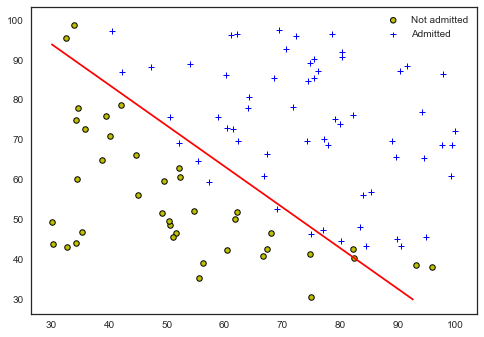

In [34]:
# plot a decision boundary
xx,yy=np.meshgrid(np.linspace(30,100,141),np.linspace(30,100,141))
one=np.ones(np.shape(xx))
X_2D = np.stack((one,xx,yy),axis=2)
# this is a very vectorized algorithm, I'm pretty proud of it
z=sp.special.expit(X_2D.dot(res.x))

# all the dots
plt.scatter(X[ind0,0],X[ind0,1], s=30, c='y', marker='o', linewidths=1, label='Not admitted')
plt.scatter(X[ind1,0],X[ind1,1], s=30, c='b', marker='+', linewidths=1, label='Admitted')
plt.legend()

# dividing line
plt.contour(xx,yy,z,[0.5],colors='r')

In [50]:
# a predict function
def predictFunction(theta,X):
    return(sp.special.expit(np.insert(X,[0],1).dot(theta)))

In [52]:
predictFunction(res.x,[45,85])

0.77628961555287068

In [72]:
# evaluate our algorithm
y_predict=(sp.special.expit(X_ext.dot(res.x)) >= 0.5).astype(int)
print('Correct ratio: \n',np.sum((y_predict==y.T).astype(int)==1)/np.size(y))

Correct ratio: 
 0.89
